In [110]:
# 0. Preparing

In [111]:
# 导入 warning -> 忽略警告信息
import warnings
warnings.filterwarnings("ignore")

# 导入 scipy -> 统计模块和函数
from scipy import stats
from scipy.stats import norm, skew

In [112]:
import numpy as np
import pandas as pd # 数据处理
import seaborn as sns # 绘图
import matplotlib.pyplot as plt

In [113]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) # 限制浮点数输出到小数点后三位

In [114]:
# 导入 os -> 列出目录中可用的文件
import os
print('\n'.join(os.listdir('./File Provided')))

test.csv
data_description.txt
train.csv
sample_submission.csv


In [115]:
# 1. Load data

In [116]:
train_data = pd.read_csv("./File Provided/train.csv")
test_data = pd.read_csv("./File Provided/test.csv")

In [117]:
# 打印样本数量和特征数量
# print(format(train_data.shape))
# print(format(test_data.shape))

In [118]:
train_data.head()
test_data.head()

# save Id coloumn
# train_Id = train_data['Id']
# test_Id = test_data['Id']
# delete the Id coloumn from the original data
# train_data.drop('Id', axis = 1, inplace = True)
# test_data.drop('Id', axis = 1, inplace = True)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [119]:
# 2. Data pre-process & Feature extracting 特征工程

Text(0, 0.5, 'SalePrice')

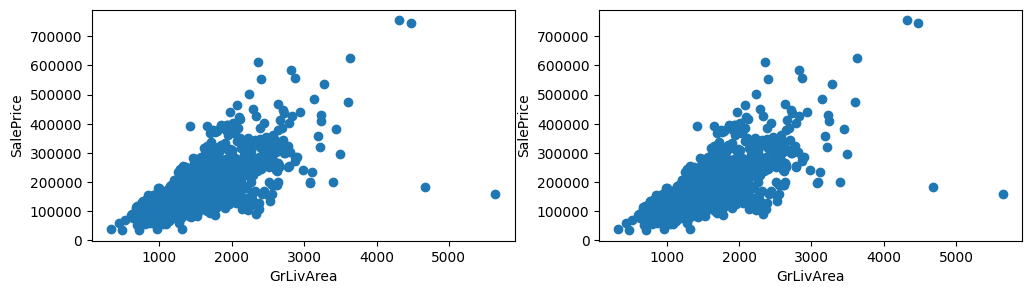

In [120]:
# 2.1 Outlier detection 异常值处理
# 通过绘制散点图直观地看出训练集特征 (train data feature) 是否有离群值

# GrLiveArea vs. SalePrice
plt.figure(figsize=(12, 3))

plt.subplot(121) # subplot 函数绘制子图 (绘制 1 行 2 列 的子图, 这个子图的 index 为 1 (将两个子图放在同一行))
plt.scatter(x = train_data['GrLivArea'], y = train_data['SalePrice']) # scatter 函数 -> 绘制散点图
plt.xlabel('GrLivArea', fontsize = 10)
plt.ylabel('SalePrice', fontsize = 10)
# train_data = train_data.drop(train_data[(train_data['GrLivArea'] > 4000) & (train_data['SalePrice'] < 300000)].index) # 去除 index 1 的离群值

plt.subplot(122) # 绘制 1 行 2 列 的子图, 这个子图的 index 为 2
plt.scatter(x = train_data['GrLivArea'], y = train_data['SalePrice'])
plt.xlabel('GrLivArea', fontsize = 10)
plt.ylabel('SalePrice', fontsize = 10)

# 删除离群值并不总是安全的 (不能且不必将所有离群值去除)
# 因为测试集中也有一定的离群值, 使用带有一定噪声的数据训练出来的模型会有更高的鲁棒性 (Better performance)

In [ ]:
# 2.2 Target variable analysis 目标变量分析

# SalePrice is our targer variable
# 画出 SalePrice 的分布图 Distributed Plot 和 QQ 图 (Quantile Quantile Plot)
# QQ 图 (x - 标准正态分布的分位数, y - 样本值)
# 如果 QQ 图上的点在一条直线上 -> 数据近似于正态分布 (直线斜率为标准差, 截距为均值)